In [ ]:
fvimport pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk
from nltk.tokenize import word_tokenize

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import SnowballStemmer
import string
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer



In [ ]:
df_workdays = pd.read_csv('labelled_data_workday.csv')

In [ ]:
df_workdays

,Unnamed: 0,Extracted,Label
0,0,Chinna Subbarayudu M DOB th March Na...,workday resumes
1,1,Name Gopi Krishna Reddy ...,workday resumes
2,2,Hari Krishna M Summary A result oriente...,workday resumes
3,3,Harikrishna Akula ...,workday resumes
4,4,HIMA MENDU Career Objective To contin...,workday resumes
5,5,G Himaja ...,workday resumes
6,6,JYOTI VERMA PROFESSIONAL SUMMARY PROF...,workday resumes
7,7,Madeeswar A PROFILE SUMMARY Hav...,workday resumes
8,8,Mooraboyina Guravaiah Workday Integration Spe...,workday resumes
9,9,Name Naresh Babu Cherukuri Objective To...,workday resumes


In [ ]:
df_RejactResumes = pd.read_csv('labelled_data_RejactResumes.csv')

In [ ]:
df_RejactResumes

,Unnamed: 0,Extracted,Label
0,0,Name Ravali P ...,Rejact Resumes
1,1,Kanumuru Deepak Reddy CAREER OBJECTIVE...,Rejact Resumes
2,2,HARIPRIYA BATTINA Experience as UI Developer...,Rejact Resumes
3,3,KAMALAKAR REDDY A Linked In https www li...,Rejact Resumes
4,4,Naveen Sadhu Title software developer ...,Rejact Resumes
5,5,PRAGNYA PATTNAIK Expertise Ha...,Rejact Resumes
6,6,SARALA MADASU SARALA MADASU Sri geethi...,Rejact Resumes
7,7,Thirupathamma Balla SUMMARY year of...,Rejact Resumes
8,8,Ui Developer React JS Developer NAME KRISH...,Rejact Resumes
9,9,Ui Developer React JS Developer NAME KRISH...,Rejact Resumes


In [ ]:
df_sql = pd.read_csv('labelled_data_sql.csv')

In [ ]:
df_sql

,Unnamed: 0,Extracted,Label
0,0,ANIL KUMAR MADDUKURI SQL MSBI Developer...,SQL Developer Lightning insight
1,1,Aradhana Tripathi Current Location Gachibo...,SQL Developer Lightning insight
2,2,BUDDHA VAMSI ...,SQL Developer Lightning insight
3,3,KAMBALLA PRADEEP ...,SQL Developer Lightning insight
4,4,Hyderabad Nazeer Basha SQL and Power BI D...,SQL Developer Lightning insight
5,5,Resume Name Neeraj Mishra Experienc...,SQL Developer Lightning insight
6,6,SQL DEVELOPER Name Bandi prem sai Car...,SQL Developer Lightning insight
7,7,SQL SERVER DEVELOPER Priyanka L ...,SQL Developer Lightning insight
8,8,SQL SERVER DEVELOPER P Syam Kumar ...,SQL Developer Lightning insight
9,9,RAJU PAVANA KUMARI Professional Summary...,SQL Developer Lightning insight


In [ ]:
df_peoplesoft = pd.read_csv('labelled_data_peoplesoft.csv')

In [ ]:
df_peoplesoft

,Unnamed: 0,Extracted,Label
0,0,Anubhav Kumar Singh Core Competencies ...,Peoplesoft resumes
1,1,G Ananda Rayudu https www linked...,Peoplesoft resumes
2,2,PeopleSoft Database Administrator ...,Peoplesoft resumes
3,3,Classification Internal Classification Inte...,Peoplesoft resumes
4,4,Priyanka Ramadoss MountPleasant C...,Peoplesoft resumes
5,5,SIRAZUDDIN M Bangalore INDIA SIRAZUDD...,Peoplesoft resumes
6,6,PEOPLESOFT Administrator SRINIVAS K ...,Peoplesoft resumes
7,7,PeopleSoft Admin VARKALA VIKAS Career Obje...,Peoplesoft resumes
8,8,Vinod Akkala ...,Peoplesoft resumes
9,9,PeopleSoft Admin PeopleSoft DBA Ganesh Alla...,Peoplesoft resumes


In [ ]:
df_internship = pd.read_csv('labelled_data_internship.csv')

In [ ]:
df_internship

,Unnamed: 0,Extracted,Label
0,0,Name Ravali P ...,Internship resumes
1,1,SUSOVAN BAG Seeking a challenging posi...,Internship resumes


In [ ]:
##concat all csv files

In [ ]:
final_nlp_project = pd.concat([df_peoplesoft,df_RejactResumes,df_sql,df_workdays,df_internship],axis=0)

In [ ]:
final_nlp_project

,Unnamed: 0,Extracted,Label
0,0,Anubhav Kumar Singh Core Competencies ...,Peoplesoft resumes
1,1,G Ananda Rayudu https www linked...,Peoplesoft resumes
2,2,PeopleSoft Database Administrator ...,Peoplesoft resumes
3,3,Classification Internal Classification Inte...,Peoplesoft resumes
4,4,Priyanka Ramadoss MountPleasant C...,Peoplesoft resumes
...,...,...,...
17,17,WORKDAY HCM FCM Name Kumar S S Role ...,workday resumes
18,18,Venkateswarlu B Workday Consultant ...,workday resumes
19,19,Vinay kumar v Workday Functional Consultant ...,workday resumes
0,0,Name Ravali P ...,Internship resumes


In [ ]:
final_nlp_project = final_nlp_project.drop(['Unnamed: 0'], axis = 1)

In [ ]:
final_nlp_project

,Extracted,Label
0,Anubhav Kumar Singh Core Competencies ...,Peoplesoft resumes
1,G Ananda Rayudu https www linked...,Peoplesoft resumes
2,PeopleSoft Database Administrator ...,Peoplesoft resumes
3,Classification Internal Classification Inte...,Peoplesoft resumes
4,Priyanka Ramadoss MountPleasant C...,Peoplesoft resumes
...,...,...
17,WORKDAY HCM FCM Name Kumar S S Role ...,workday resumes
18,Venkateswarlu B Workday Consultant ...,workday resumes
19,Vinay kumar v Workday Functional Consultant ...,workday resumes
0,Name Ravali P ...,Internship resumes


In [ ]:
##### Reindexing changes the row labels and column labels of a DataFrame. To reindex means to conform the data to match a given set of labels along a particular axis. Multiple operations can be accomplished through indexing like − Reorder the existing data to match a new set of labels.

In [ ]:
final_nlp_project.reset_index(inplace=True, drop=True)

In [ ]:
final_nlp_project

,Extracted,Label
0,Anubhav Kumar Singh Core Competencies ...,Peoplesoft resumes
1,G Ananda Rayudu https www linked...,Peoplesoft resumes
2,PeopleSoft Database Administrator ...,Peoplesoft resumes
3,Classification Internal Classification Inte...,Peoplesoft resumes
4,Priyanka Ramadoss MountPleasant C...,Peoplesoft resumes
...,...,...
71,WORKDAY HCM FCM Name Kumar S S Role ...,workday resumes
72,Venkateswarlu B Workday Consultant ...,workday resumes
73,Vinay kumar v Workday Functional Consultant ...,workday resumes
74,Name Ravali P ...,Internship resumes


In [ ]:
## checking shape of rows 

In [ ]:
final_nlp_project.shape 

(76, 2)

In [ ]:
## checking weather there are any null values or not in the dataset

In [ ]:
final_nlp_project.isnull().sum()

Extracted    0
Label        0
dtype: int64

In [ ]:
## data understanding 

In [ ]:
len(final_nlp_project)

76

In [ ]:
## counting values in the dataset 

In [ ]:
final_nlp_project['Label'].value_counts()

Peoplesoft resumes                 20
Rejact Resumes                     20
workday resumes                    20
SQL Developer Lightning insight    14
Internship resumes                  2
Name: Label, dtype: int64

In [ ]:
## all over words in data set for Extracted

In [ ]:
final_nlp_project.index = range(76)
final_nlp_project['Extracted'].apply(lambda x: len(x.split(' '))).sum()

103732

In [ ]:
## checking the information of the data

In [ ]:
final_nlp_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Extracted  76 non-null     object
 1   Label      76 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [ ]:
## Describe of the data 

In [ ]:
final_nlp_project.describe()

,Extracted,Label
count,76,76
unique,75,5
top,Name Ravali P ...,Peoplesoft resumes
freq,2,20


In [ ]:
## Exploratory data analysis


In [ ]:
## visuvalizing the  dependent with bar and pie chart to get more understand 

<AxesSubplot:ylabel='Label'>

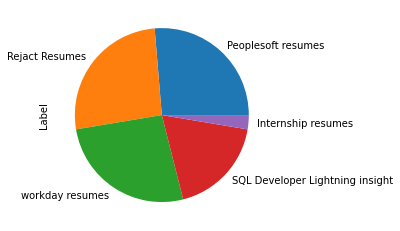

In [ ]:
final_nlp_project.Label.value_counts().plot(kind = 'pie')

<AxesSubplot:>

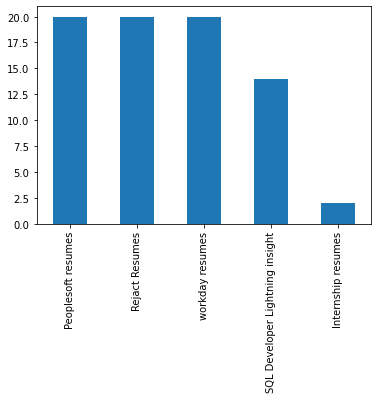

In [ ]:
final_nlp_project.Label.value_counts().plot(kind = 'bar')

+ First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the resume length

+ caculating each characterstic in dataframe

In [ ]:
final_nlp_project['Extracted'].map(len)
  
# For single values
characters = final_nlp_project['Extracted'].apply(len)

In [ ]:
characters

0     8010
1     8318
2     6900
3     4918
4     5196
      ... 
71    8329
72    6836
73    5126
74    6175
75    1901
Name: Extracted, Length: 76, dtype: int64

+ mean of each characterstics in data set

In [ ]:
print('Mean of each characters in datset:',characters.mean())
print('Median of characters in dataset:',characters.median())
print('Standard Deviation of characters in dataset:',characters.std())
print('skew of characters dataset:',characters.skew())
print('sum of characters dataset:',characters.sum())

Mean of each characters in datset: 5479.328947368421
Median of characters in dataset: 4665.0
Standard Deviation of characters in dataset: 3148.7375772443906
skew of characters dataset: 1.888408299139015
sum of characters dataset: 416429


+ describe about characters in dataset

In [ ]:
characters.describe()

count       76.000000
mean      5479.328947
std       3148.737577
min       1773.000000
25%       3292.500000
50%       4665.000000
75%       6803.000000
max      18489.000000
Name: Extracted, dtype: float64

+ lets make a histogram  for better understandying

C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

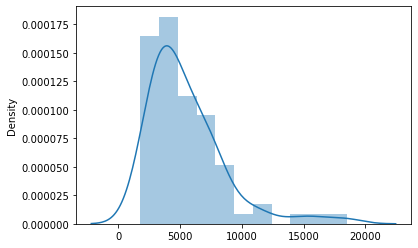

In [ ]:
sns.distplot(x = characters)

In [ ]:
 words = final_nlp_project['Extracted'].apply(lambda x: len(str(x).split(' ')))

In [ ]:
words

0     1896
1     2505
2     2133
3     1276
4     1241
      ... 
71    1756
72    1564
73    1060
74    3419
75     768
Name: Extracted, Length: 76, dtype: int64

+ average word of each length in each sentense


C:\Users\shara\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

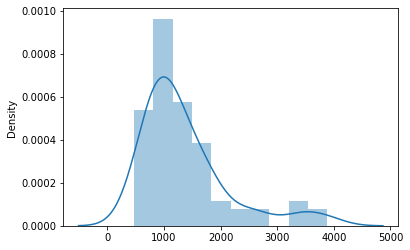

In [ ]:
sns.distplot(x = words)

+  performing discriptive stats of each words

In [ ]:
print('Mean of each words in datset:',words.mean())
print('Median of words in dataset:',words.median())
print('Standard Deviation of words in dataset:',words.std())
print('skew of words dataset:',words.skew())
print('sum of words dataset:', words.sum())

Mean of each words in datset: 1364.8947368421052
Median of words in dataset: 1093.0
Standard Deviation of words in dataset: 777.0026439928824
skew of words dataset: 1.7127220256450655
sum of words dataset: 103732


+ describe about words in dataset

In [ ]:
words.describe()

count      76.000000
mean     1364.894737
std       777.002644
min       471.000000
25%       856.000000
50%      1093.000000
75%      1587.250000
max      3886.000000
Name: Extracted, dtype: float64

# Data Preprocessing 

+ removing special characters , normalizing the data 

In [ ]:
final_nlp_project['Extracted']=final_nlp_project['Extracted'].str.replace('[#,@,&]','',regex=True)

In [ ]:
final_nlp_project

,Extracted,Label
0,Anubhav Kumar Singh Core Competencies ...,Peoplesoft resumes
1,G Ananda Rayudu https www linked...,Peoplesoft resumes
2,PeopleSoft Database Administrator ...,Peoplesoft resumes
3,Classification Internal Classification Inte...,Peoplesoft resumes
4,Priyanka Ramadoss MountPleasant C...,Peoplesoft resumes
...,...,...
71,WORKDAY HCM FCM Name Kumar S S Role ...,workday resumes
72,Venkateswarlu B Workday Consultant ...,workday resumes
73,Vinay kumar v Workday Functional Consultant ...,workday resumes
74,Name Ravali P ...,Internship resumes


In [ ]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.lower()

In [ ]:
pd.pandas.set_option('display.max_rows',None)
final_nlp_project

,Extracted,Label
0,anubhav kumar singh core competencies ...,Peoplesoft resumes
1,g ananda rayudu https www linked...,Peoplesoft resumes
2,peoplesoft database administrator ...,Peoplesoft resumes
3,classification internal classification inte...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant c...,Peoplesoft resumes
5,sirazuddin m bangalore india sirazudd...,Peoplesoft resumes
6,peoplesoft administrator srinivas k ...,Peoplesoft resumes
7,peoplesoft admin varkala vikas career obje...,Peoplesoft resumes
8,vinod akkala ...,Peoplesoft resumes
9,peoplesoft admin peoplesoft dba ganesh alla...,Peoplesoft resumes


+ removing numbers in dataset

In [ ]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('\d+', '')

C:\Users\shara\AppData\Local\Temp/ipykernel_22288/2962813051.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('\d+', '')


In [ ]:
final_nlp_project

,Extracted,Label
0,anubhav kumar singh core competencies ...,Peoplesoft resumes
1,g ananda rayudu https www linked...,Peoplesoft resumes
2,peoplesoft database administrator ...,Peoplesoft resumes
3,classification internal classification inte...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant c...,Peoplesoft resumes
5,sirazuddin m bangalore india sirazudd...,Peoplesoft resumes
6,peoplesoft administrator srinivas k ...,Peoplesoft resumes
7,peoplesoft admin varkala vikas career obje...,Peoplesoft resumes
8,vinod akkala ...,Peoplesoft resumes
9,peoplesoft admin peoplesoft dba ganesh alla...,Peoplesoft resumes


+ checking integers are removed r not 

In [ ]:
res = True if next((chr for chr in final_nlp_project if chr.isdigit()), None) else False

In [ ]:
print(res)

False


+ Removing urls 

In [ ]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\shara\AppData\Local\Temp/ipykernel_22288/3501214057.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('http\S+|www.\S+', '', case=False)


In [ ]:
final_nlp_project

,Extracted,Label
0,anubhav kumar singh core competencies ...,Peoplesoft resumes
1,g ananda rayudu com in anandgu...,Peoplesoft resumes
2,peoplesoft database administrator ...,Peoplesoft resumes
3,classification internal classification inte...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant c...,Peoplesoft resumes
5,sirazuddin m bangalore india sirazudd...,Peoplesoft resumes
6,peoplesoft administrator srinivas k ...,Peoplesoft resumes
7,peoplesoft admin varkala vikas career obje...,Peoplesoft resumes
8,vinod akkala ...,Peoplesoft resumes
9,peoplesoft admin peoplesoft dba ganesh alla...,Peoplesoft resumes


+ 

In [ ]:
 final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('[{}]'.format(string.punctuation), '')


C:\Users\shara\AppData\Local\Temp/ipykernel_22288/345470314.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.replace('[{}]'.format(string.punctuation), '')


+ removing special characters

In [ ]:
final_nlp_project['Extracted']=final_nlp_project['Extracted'].str.replace('[#,@,&]','')

C:\Users\shara\AppData\Local\Temp/ipykernel_22288/1505200660.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final_nlp_project['Extracted']=final_nlp_project['Extracted'].str.replace('[#,@,&]','')


In [ ]:
final_nlp_project

,Extracted,Label
0,anubhav kumar singh core competencies ...,Peoplesoft resumes
1,g ananda rayudu com in anandgu...,Peoplesoft resumes
2,peoplesoft database administrator ...,Peoplesoft resumes
3,classification internal classification inte...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant c...,Peoplesoft resumes
5,sirazuddin m bangalore india sirazudd...,Peoplesoft resumes
6,peoplesoft administrator srinivas k ...,Peoplesoft resumes
7,peoplesoft admin varkala vikas career obje...,Peoplesoft resumes
8,vinod akkala ...,Peoplesoft resumes
9,peoplesoft admin peoplesoft dba ganesh alla...,Peoplesoft resumes


+ removing white spaces 

In [ ]:
final_nlp_project['Extracted'].str.strip()


0     anubhav kumar singh      core competencies    ...
1     g  ananda rayudu                com in anandgu...
2     peoplesoft database administrator             ...
3     classification  internal  classification  inte...
4     priyanka ramadoss          mountpleasant     c...
5     sirazuddin m   bangalore  india       sirazudd...
6     peoplesoft administrator      srinivas k      ...
7     peoplesoft admin  varkala vikas    career obje...
8     vinod akkala                                  ...
9     peoplesoft admin peoplesoft dba    ganesh alla...
10    peoplesoft administration     vivekanand sayan...
11    arun venu       experience summary       exper...
12    personal details      name  pritam biswas  dat...
13    rahul ahuja                                   ...
14    hari narayana                                 ...
15    murali                             professiona...
16    priyabrata hota      career objective      pur...
17    r ahmed                                   

+ applying Contractions

+ removing stopwords

In [ ]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print(len(sw_nltk))


179


In [ ]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].apply(lambda x: " ".join(x for x in x.split() if x not in sw_nltk))

In [ ]:
final_nlp_project

,Extracted,Label
0,anubhav kumar singh core competencies scriptin...,Peoplesoft resumes
1,g ananda rayudu com anandgudapati profile summ...,Peoplesoft resumes
2,peoplesoft database administrator gangareddy p...,Peoplesoft resumes
3,classification internal classification interna...,Peoplesoft resumes
4,priyanka ramadoss mountpleasant coonoor nilgir...,Peoplesoft resumes
5,sirazuddin bangalore india sirazuddin bangalor...,Peoplesoft resumes
6,peoplesoft administrator srinivas k experience...,Peoplesoft resumes
7,peoplesoft admin varkala vikas career objectiv...,Peoplesoft resumes
8,vinod akkala peoplesoft dba admin professional...,Peoplesoft resumes
9,peoplesoft admin peoplesoft dba ganesh alladi ...,Peoplesoft resumes


+ Tokenization is breaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

In [ ]:
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].str.split()


In [ ]:
final_nlp_project

,Extracted,Label
0,"[anubhav, kumar, singh, core, competencies, sc...",Peoplesoft resumes
1,"[g, ananda, rayudu, com, anandgudapati, profil...",Peoplesoft resumes
2,"[peoplesoft, database, administrator, gangared...",Peoplesoft resumes
3,"[classification, internal, classification, int...",Peoplesoft resumes
4,"[priyanka, ramadoss, mountpleasant, coonoor, n...",Peoplesoft resumes
5,"[sirazuddin, bangalore, india, sirazuddin, ban...",Peoplesoft resumes
6,"[peoplesoft, administrator, srinivas, k, exper...",Peoplesoft resumes
7,"[peoplesoft, admin, varkala, vikas, career, ob...",Peoplesoft resumes
8,"[vinod, akkala, peoplesoft, dba, admin, profes...",Peoplesoft resumes
9,"[peoplesoft, admin, peoplesoft, dba, ganesh, a...",Peoplesoft resumes


+ Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [ ]:
lemmatiazer = WordNetLemmatizer()
final_nlp_project['Extracted'] = final_nlp_project['Extracted'].apply(lambda x: [lemmatiazer.lemmatize(y) for y in x]) 



In [ ]:
final_nlp_project

,Extracted,Label
0,"[anubhav, kumar, singh, core, competency, scri...",Peoplesoft resumes
1,"[g, ananda, rayudu, com, anandgudapati, profil...",Peoplesoft resumes
2,"[peoplesoft, database, administrator, gangared...",Peoplesoft resumes
3,"[classification, internal, classification, int...",Peoplesoft resumes
4,"[priyanka, ramadoss, mountpleasant, coonoor, n...",Peoplesoft resumes
5,"[sirazuddin, bangalore, india, sirazuddin, ban...",Peoplesoft resumes
6,"[peoplesoft, administrator, srinivas, k, exper...",Peoplesoft resumes
7,"[peoplesoft, admin, varkala, vikas, career, ob...",Peoplesoft resumes
8,"[vinod, akkala, peoplesoft, dba, admin, profes...",Peoplesoft resumes
9,"[peoplesoft, admin, peoplesoft, dba, ganesh, a...",Peoplesoft resumes


+ Detokenize it is used to untokenzier the data 